In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

import numpy as np
import os
from collections import Counter
import itertools

In [54]:
data = pd.read_csv('data.csv', encoding="ISO-8859-1", names = ['pn', 'id', 'time', 'query', 'twitter_id', 'tweet'])
data = data.sample(frac = 1)

In [55]:
data.head()

,pn,id,time,query,twitter_id,tweet
813277,4,1548753151,Fri Apr 17 21:52:19 PDT 2009,NO_QUERY,cher3408,@mooshinindy When you get ur answer to the twi...
544206,0,2201029435,Tue Jun 16 19:42:24 PDT 2009,NO_QUERY,marissa_alex,raw shrimp on my plate moved...but no witnesses
781939,0,2323528360,Thu Jun 25 00:51:27 PDT 2009,NO_QUERY,SahaSmile,@creepstreet noooooo! Where did you pick?
202802,0,1972211678,Sat May 30 08:47:24 PDT 2009,NO_QUERY,mcraddictal,@myhaloromance you're not answering D:
845828,4,1564285032,Mon Apr 20 02:43:52 PDT 2009,NO_QUERY,greekdude,@faultlines yep I have general knowledge of ev...


In [56]:
data.tail()

,pn,id,time,query,twitter_id,tweet
249501,0,1982976791,Sun May 31 12:16:02 PDT 2009,NO_QUERY,conorkilmartin,Great aul day in Carlow Exams on Wednesday
999201,4,1836416376,Mon May 18 07:57:36 PDT 2009,NO_QUERY,sproutdr,@kibbe @rufusisnodufus ditch cable a must! agr...
1271937,4,2000630860,Mon Jun 01 22:33:46 PDT 2009,NO_QUERY,nikcz,@peterfacinelli NO that was not the right choi...
187413,0,1968644861,Fri May 29 21:53:14 PDT 2009,NO_QUERY,heavenlykevinly,@annzoo NO MORE FOOD FOR YOU
1143418,4,1977442092,Sat May 30 20:59:17 PDT 2009,NO_QUERY,jojo_n,"&quot;If you have a fever, nasal congestion, r..."


In [57]:
data

,pn,id,time,query,twitter_id,tweet
813277,4,1548753151,Fri Apr 17 21:52:19 PDT 2009,NO_QUERY,cher3408,@mooshinindy When you get ur answer to the twi...
544206,0,2201029435,Tue Jun 16 19:42:24 PDT 2009,NO_QUERY,marissa_alex,raw shrimp on my plate moved...but no witnesses
781939,0,2323528360,Thu Jun 25 00:51:27 PDT 2009,NO_QUERY,SahaSmile,@creepstreet noooooo! Where did you pick?
202802,0,1972211678,Sat May 30 08:47:24 PDT 2009,NO_QUERY,mcraddictal,@myhaloromance you're not answering D:
845828,4,1564285032,Mon Apr 20 02:43:52 PDT 2009,NO_QUERY,greekdude,@faultlines yep I have general knowledge of ev...
1483193,4,2067416115,Sun Jun 07 12:18:17 PDT 2009,NO_QUERY,catbionic,@mileycyrus http://twitpic.com/6shtr - This is...
1259134,4,1998048432,Mon Jun 01 17:54:21 PDT 2009,NO_QUERY,ninoafricano,what am i doing? i love somebody
1066305,4,1965278131,Fri May 29 15:38:18 PDT 2009,NO_QUERY,CT415,@DEWz_PingPong Awwwww love you too sweetie!
794231,0,2326915780,Thu Jun 25 07:40:45 PDT 2009,NO_QUERY,hitomibunny,I stink at painting my own nails
578057,0,2212883104,Wed Jun 17 14:39:29 PDT 2009,NO_QUERY,BigAssBadger,"@PembsDave Was ok, till the council decided to..."


In [58]:
data.size

9600000

In [59]:
data['pn'].unique() #Positive or Negative, 4 is positive, 0 is negative

array([4, 0], dtype=int64)

In [60]:
data['id'].unique() #ID

array([1548753151, 2201029435, 2323528360, ..., 2000630860, 1968644861,
       1977442092], dtype=int64)

In [61]:
data['twitter_id'].unique()

array(['cher3408', 'marissa_alex', 'SahaSmile', ..., 'ghostdiranders',
       'cdown16', 'pepitapanther'], dtype=object)

In [62]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english").stem

In [63]:
text_clean = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [64]:
def preprocess(tweet, stem = False):
    text = re.sub(text_clean,' ', str(tweet).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    
    return " ".join(tokens)

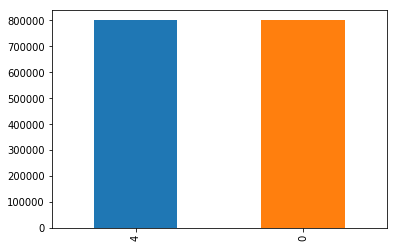

In [65]:
data['pn'].value_counts().plot(kind = 'bar')

In [66]:
df_negative = data[data['pn'] == 0]

df_positive = data[data['pn'] == 4]

In [67]:
df_negative

,pn,id,time,query,twitter_id,tweet
544206,0,2201029435,Tue Jun 16 19:42:24 PDT 2009,NO_QUERY,marissa_alex,raw shrimp on my plate moved...but no witnesses
781939,0,2323528360,Thu Jun 25 00:51:27 PDT 2009,NO_QUERY,SahaSmile,@creepstreet noooooo! Where did you pick?
202802,0,1972211678,Sat May 30 08:47:24 PDT 2009,NO_QUERY,mcraddictal,@myhaloromance you're not answering D:
794231,0,2326915780,Thu Jun 25 07:40:45 PDT 2009,NO_QUERY,hitomibunny,I stink at painting my own nails
578057,0,2212883104,Wed Jun 17 14:39:29 PDT 2009,NO_QUERY,BigAssBadger,"@PembsDave Was ok, till the council decided to..."
657102,0,2240830731,Fri Jun 19 10:12:53 PDT 2009,NO_QUERY,Liebrarien,I am very well!!
647492,0,2236776722,Fri Jun 19 04:30:43 PDT 2009,NO_QUERY,thespitfire,plans sort of failed last night. realised i di...
725277,0,2262285688,Sat Jun 20 22:13:17 PDT 2009,NO_QUERY,littlejenn,Summer starts when I say so... I want food fro...
229619,0,1978520754,Sat May 30 23:37:03 PDT 2009,NO_QUERY,courtberger,@randielynn Agreed
750866,0,2285844160,Mon Jun 22 15:39:24 PDT 2009,NO_QUERY,Jostralia,sprained my ankle can't dance!! this is HORRIBLE


In [68]:
df_positive

,pn,id,time,query,twitter_id,tweet
813277,4,1548753151,Fri Apr 17 21:52:19 PDT 2009,NO_QUERY,cher3408,@mooshinindy When you get ur answer to the twi...
845828,4,1564285032,Mon Apr 20 02:43:52 PDT 2009,NO_QUERY,greekdude,@faultlines yep I have general knowledge of ev...
1483193,4,2067416115,Sun Jun 07 12:18:17 PDT 2009,NO_QUERY,catbionic,@mileycyrus http://twitpic.com/6shtr - This is...
1259134,4,1998048432,Mon Jun 01 17:54:21 PDT 2009,NO_QUERY,ninoafricano,what am i doing? i love somebody
1066305,4,1965278131,Fri May 29 15:38:18 PDT 2009,NO_QUERY,CT415,@DEWz_PingPong Awwwww love you too sweetie!
1531690,4,2178078942,Mon Jun 15 07:09:48 PDT 2009,NO_QUERY,PChana,Chilling on the sofa watching neighbours
891777,4,1690943843,Sun May 03 16:44:11 PDT 2009,NO_QUERY,ciclistadanfb,Lisa Marie Greene Thinks it is time to TRAVEL!...
1195354,4,1984615192,Sun May 31 15:27:32 PDT 2009,NO_QUERY,JoeTisdaLe,well maybe Lady be Bi I Dont Care She's so Hot..
1287588,4,2002385945,Tue Jun 02 04:03:32 PDT 2009,NO_QUERY,chuckg4509,@supersara1720 Sleepy right now Sara...7 AM he...
1595814,4,2192513368,Tue Jun 16 07:08:57 PDT 2009,NO_QUERY,Johannah7,"TEAM TWILIGHT! Follow @peterfacinelli , @billy..."


Text(0.5,1,'Positive vs Negative')

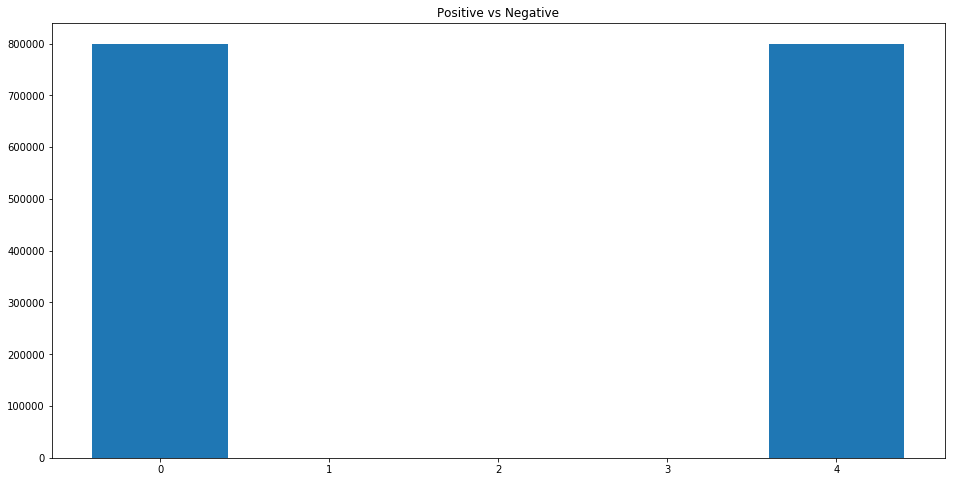

In [69]:
cnt = Counter(data['pn'])

plt.figure(figsize=(16,8))
plt.bar(cnt.keys(), cnt.values())
plt.title("Positive vs Negative")

In [70]:
splitter = int(len(data) * .8)
splitter

1280000

In [71]:
data = data.dropna()

data.shape

(1600000, 6)

In [76]:
from nltk import word_tokenize

def stem_tokenize(text):
    return [stemmer(i) for i in word_tokenize(text)]

vectorizer = TfidfVectorizer(max_df= 0.95,min_df= 0.001,
            tokenizer= stem_tokenize,decode_error='ignore',
            sublinear_tf= True )

In [77]:
vectorMatrixClean = vectorizer.fit_transform(data['tweet'])
vectorMatrixTrainClean = vectorMatrixClean[0:splitter]
vectorMatrixTestClean = vectorMatrixClean[splitter:]

In [78]:
vectorMatrixClean.shape

(1600000, 1131)

In [79]:
data['pn'].unique()

array([4, 0], dtype=int64)

In [80]:
labeldataset = data['pn']
labelTrain = labeldataset[0:splitter]
labelTest = labeldataset[splitter:]

In [81]:
vectorMatrixTrainClean.shape


(1280000, 1131)

In [82]:
def giveMetrics(nameCLF,trainedclf,trainData,trainLabel,testData,testLabel):
    trainScore = trainedclf.score(trainData,trainLabel)
    testScore = trainedclf.score(testData,testLabel)
    print('{} has following attributes : '.format(nameCLF))
    print('The training Accuracy of {} model is : {} '.format(nameCLF,trainScore))
    print('The testing Accuracy of {} model is : {} '.format(nameCLF,testScore))
    return trainScore,testScore

In [83]:
clfMB = MultinomialNB(alpha=0.001)
clfMB.fit(vectorMatrixTrainClean,labelTrain)

giveMetrics('Multinomial Naive Bayes',clfMB,vectorMatrixTrainClean,labelTrain,vectorMatrixTestClean,labelTest)


Multinomial Naive Bayes has following attributes : 
The training Accuracy of Multinomial Naive Bayes model is : 0.759584375 
The testing Accuracy of Multinomial Naive Bayes model is : 0.75934375 


(0.759584375, 0.75934375)

In [84]:
clfBer = BernoulliNB().fit(vectorMatrixTrainClean,labelTrain)
giveMetrics('Bernoulli CLassifier',clfBer,vectorMatrixTrainClean,labelTrain,vectorMatrixTestClean,labelTest)

Bernoulli CLassifier has following attributes : 
The training Accuracy of Bernoulli CLassifier model is : 0.75483046875 
The testing Accuracy of Bernoulli CLassifier model is : 0.75459375 


(0.75483046875, 0.75459375)

In [85]:
clf_names = ['Multinomial-NB',' Bernoulli NB']
classifiers = [clfMB,clfBer]
overallScores = []
for clf_names,classifiers in zip(clf_names,classifiers):
    overallScores.append(giveMetrics(clf_names,classifiers,vectorMatrixTrainClean,labelTrain,vectorMatrixTestClean,labelTest))

Multinomial-NB has following attributes : 
The training Accuracy of Multinomial-NB model is : 0.759584375 
The testing Accuracy of Multinomial-NB model is : 0.75934375 
 Bernoulli NB has following attributes : 
The training Accuracy of  Bernoulli NB model is : 0.75483046875 
The testing Accuracy of  Bernoulli NB model is : 0.75459375 


In [86]:
overallScores

[(0.759584375, 0.75934375), (0.75483046875, 0.75459375)]

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout() #

Normalized confusion matrix
[[0.75 0.25]
 [0.24 0.76]]


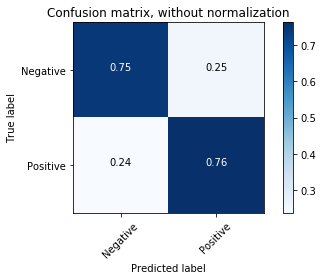

In [88]:
cnf_matrix = confusion_matrix( labelTest , clfBer.predict(vectorMatrixTestClean)) 
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize=True,
                      title='Confusion matrix, without normalization')

In [89]:
def predict(text,clf,vectorizer,preprocess):
    t_text = preprocess(text)
    vect_text = vectorizer.transform([t_text])
    out = clf.predict(vect_text)
    if out[0] == 0 :
        return 'Negative'
    else :
        return 'Positive'

x = "The leafs are trash, imagine missing the playoffs with this much talent"
predict(x,clfMB,vectorizer,preprocess)

'Negative'

In [90]:
import pickle

with open('TwitterModel.pkl', 'wb') as f:
    pickle.dump(clfMB, f)

In [91]:
model = pd.read_pickle('TwitterModel.pkl')

predict(x,model,vectorizer,preprocess)

'Negative'

In [92]:
y = "Raptors looking really good out there!"

predict(y,model,vectorizer,preprocess)

'Positive'

In [93]:
t = "The leafs should be really good but they are really bad"

predict(t,model,vectorizer,preprocess)

'Negative'

In [94]:
import pickle

with open('vectorizer.pkl', 'wb') as fin:
    pickle.dump(vectorizer, fin)
